# _Stress Detection on Social Media Posts_

<img src='../data/stress.png'>

## _Proje Açıklaması_
_Bu proje, sosyal medya gönderilerinde kullanıcıların stresli olup olmadığını tespit etmeyi amaçlamaktadır.  
Girdi olarak kullanıcı gönderileri (`text`), çıktı olarak stres durumu (`label`) kullanılacaktır:_
- _`0` → Stres yok_  
- _`1` → Stres var_  

_Bu proje bir **Binary Classification** problemidir._

## _Kullanılacak Sütunlar_
- _`text` → Kullanıcının gönderisi (girdi)_
- _`label` → Stres durumu (çıktı)_

## _Data Preprocessing_

### _Import_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

# pandas kütüphanesi veri analizi ve tablo (DataFrame) işlemleri için kullanılır.
# Bu ayar, çıktıdaki maksimum sütun sayısını 100 olarak belirler, böylece veriler tam görünür.

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

### _Read Data_

In [2]:
df = pd.read_csv('../data/stress.csv')

# 'stress.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

In [3]:
# Sadece text ve label sütunlarını al
df = df[['text', 'label']]

### _Exploratory Data Analysis_

In [4]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [5]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,text,label
986,All that. When we're not together in the eveni...,0


In [6]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(2838, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2838 non-null   object
 1   label   2838 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.5+ KB


In [8]:
df.isnull().sum()
# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

text     0
label    0
dtype: int64

## _Text Cleaning and Preprocessing with NeatText_

### _Import_

In [9]:
import neattext as nfx  

# neattext kütüphanesini içe aktarır; metin temizleme ve ön işleme işlemleri için kullanılır

### _clean_text;_

In [10]:
df['text'] = df['text'].apply(nfx.clean_text)  

# DataFrame’deki tüm metinleri temizler; özel karakterler, sayılar ve gereksiz boşlukları kaldırır

### _remove_special_characters;_

In [11]:
df['text'] = df['text'].apply(nfx.remove_special_characters)  

# DataFrame’deki metinlerden özel karakterleri kaldırır

In [12]:
df['text']  

# Temizlenmiş ve özel karakterlerden arındırılmış metin sütununu görüntüler

0       said felt way before suggeted rest trigger ahe...
1       hey rassistance sure right place post this goe...
2       mom hit newspaper shocked this knows like play...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
2833     her week ago precious you i ignored her  her ...
2834    ability cope anymore im trying lot things trig...
2835    case time reading post looking people willing ...
2836    find normal good relationship main problem mom...
2837    talking mom morning said sister trauma worse d...
Name: text, Length: 2838, dtype: object

### _normalize;_

In [13]:
df['text'] = df['text'].apply(nfx.normalize)  

# DataFrame’deki tüm metinleri normalize eder; boşlukları düzeltir ve yazım standartlarını uygular

In [14]:
df['text']  

# Normalize edildikten sonra metnin güncellenmiş hâlini görüntüler

0       said felt way before suggeted rest trigger ahe...
1       hey rassistance sure right place post this goe...
2       mom hit newspaper shocked this knows like play...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
2833     her week ago precious you i ignored her  her ...
2834    ability cope anymore im trying lot things trig...
2835    case time reading post looking people willing ...
2836    find normal good relationship main problem mom...
2837    talking mom morning said sister trauma worse d...
Name: text, Length: 2838, dtype: object

## _Seaborn_

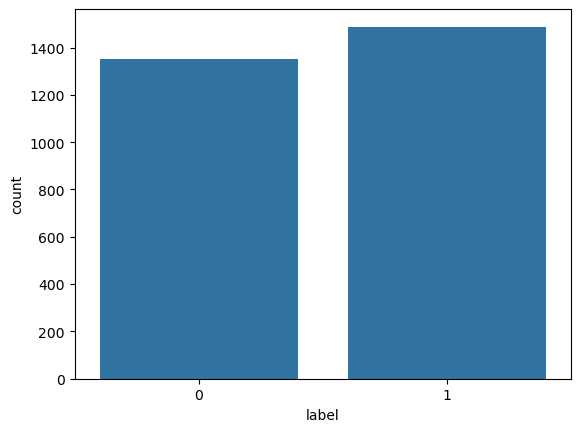

In [15]:
sns.countplot(x=df['label']);  

# _Using Pipeline for Data Processing and Modeling_

## _RandomForestClassifier_

### _Import_

In [16]:
from sklearn.feature_extraction.text import CountVectorizer  

# Metinleri sayısal vektörlere dönüştürmek için CountVectorizer sınıfını içe aktarır

from sklearn.ensemble import RandomForestClassifier  

# Random Forest sınıflandırma modelini içe aktarır; birden fazla karar ağacını birleştirerek güçlü bir tahmin modeli oluşturur

from sklearn.pipeline import Pipeline  

# Veri işleme ve model adımlarını ardışık bir şekilde birleştirmek için Pipeline sınıfını içe aktarır

from sklearn.model_selection import train_test_split  

# Veriyi eğitim ve test setlerine ayırmak için gerekli fonksiyonu içe aktarır

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  

# Model performansını değerlendirmek için gerekli metrikleri ve karışıklık matrisini içe aktarır

from sklearn.svm import SVC  

# Destek Vektör Makinesi (Support Vector Classifier) sınıflandırıcı modelini içe aktarır

import joblib

# joblib kütüphanesini projeye dahil eder

### _x, y;_

In [17]:
x = df['text']  
# Modelin girdi (features) verisi olarak metin sütununu alır

y = df['label']  
# Modelin hedef (target) verisi olarak sınıf sütununu alır (ham/spam)

### _Pipeline;_

In [18]:
clf = Pipeline([
    ('CountVect', CountVectorizer()),
    ('Classifier', RandomForestClassifier())
])  

# Pipeline ile metin verisini önce CountVectorizer ile vektörleştirir, ardından Random Forest sınıflandırıcı ile tahmin yapar

### _train_test_split;_

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)  

# Veriyi %80 eğitim ve %20 test olarak ayırır; random_state ile tekrar üretilebilirlik sağlanır

### _fit;_

In [20]:
clf.fit(x_train, y_train)  

# Pipeline içindeki CountVectorizer ve Random Forest modelini eğitim verisi ile birlikte eğitir

Pipeline(steps=[('CountVect', CountVectorizer()),
                ('Classifier', RandomForestClassifier())])

### _predict;_

In [21]:
tahmin = clf.predict(x_test)  

# Eğitilmiş model ile test verisinin sınıflarını tahmin eder

### _accuracy_score;_

In [22]:
accuracy_score(y_test, tahmin)  

# Modelin test verisi üzerindeki doğruluk (accuracy) oranını hesaplar

0.6971830985915493

### _classification_report;_

In [23]:
print(classification_report(y_test, tahmin))  

# Modelin test verisi üzerindeki sınıf bazlı performansını gösterir
# Precision, Recall, F1-score ve destek (support) değerlerini içerir

              precision    recall  f1-score   support

           0       0.71      0.59      0.64       263
           1       0.69      0.79      0.74       305

    accuracy                           0.70       568
   macro avg       0.70      0.69      0.69       568
weighted avg       0.70      0.70      0.69       568



### _confusion_matrix;_

In [24]:
confusion_matrix(tahmin, y_test)  

# Tahminler ile gerçek değerler arasındaki karışıklık matrisini hesaplar
# Hangi sınıfların doğru/yanlış tahmin edildiğini gösterir

array([[155,  64],
       [108, 241]])

## _Support Vector Classifier;_

### _pipeline;_

In [25]:
svm = Pipeline([
    ('CountVect', CountVectorizer()),
    ('Classifier', SVC())
])  

# Pipeline oluşturur: metni önce CountVectorizer ile vektörleştirir, ardından Support Vector Classifier ile sınıflandırır

### _svm.fit;_

In [26]:
svm.fit(x_train, y_train)  

# Pipeline içindeki CountVectorizer ve Random Forest modelini eğitim verisi ile birlikte eğitir

Pipeline(steps=[('CountVect', CountVectorizer()), ('Classifier', SVC())])

### _svm.predict;_

In [27]:
tahmin2 = svm.predict(x_test)  

# Eğitilmiş model ile test verisinin sınıflarını tahmin eder

### _accuracy_score;_

In [28]:
accuracy_score(y_test, tahmin2)  

# İkinci modelin (svm pipeline) test verisi üzerindeki doğruluk (accuracy) oranını hesaplar

0.704225352112676

### _classification_report;_

In [29]:
print(classification_report(y_test, tahmin2))  

# İkinci modelin test verisi üzerindeki sınıf bazlı performansını gösterir
# Precision, Recall, F1-score ve destek (support) değerlerini içerir

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       263
           1       0.74      0.69      0.72       305

    accuracy                           0.70       568
   macro avg       0.70      0.71      0.70       568
weighted avg       0.71      0.70      0.70       568



### _confusion_matrix;_

In [30]:
confusion_matrix(tahmin2, y_test)  

# İkinci modelin tahminleri ile gerçek değerler arasındaki karışıklık matrisini hesaplar
# Hangi sınıfların doğru/yanlış tahmin edildiğini gösterir

array([[189,  94],
       [ 74, 211]])

### _heatmap;_

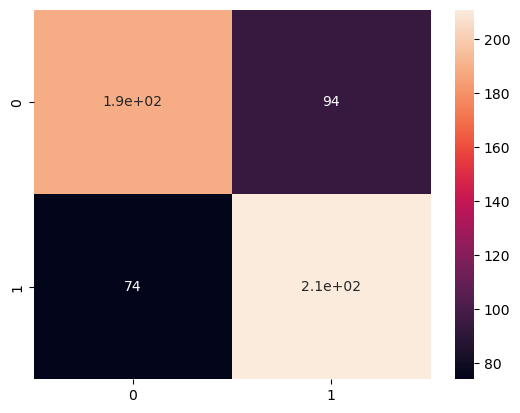

In [31]:
sns.heatmap(confusion_matrix(tahmin2, y_test), annot=True);  

# İkinci modelin karışıklık matrisini görselleştirir
# Annot=True ile hücre değerlerini gösterir

## _Using Joblib for Model Persistence_

In [32]:
joblib.dump(svm,'svm_hs.pkl')

# SVM modelini svm_hs.pkl dosyasına kaydeder

['svm_hs.pkl']

_Bu projede iki farklı model eğitilmiştir ve performansları karşılaştırılmıştır._
_İkinci model (SVM), daha yüksek doğruluk ve daha dengeli sınıflandırma performansı gösterdiği için **en iyi model olarak seçilmiştir**._